In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# upload data
df = pd.read_csv("balanced_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [3]:
# converting data to X/y
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [4]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # No limit on tree depth
    random_state=42,
    class_weight="balanced"  # Adjust for class imbalance
)

In [6]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Make predictions
test_predictions = rf_model.predict(X_test)

# Define categories (Replace with your actual categories)
categories = ["No", "Yes"]  # Replace based on your dataset

# Print the classification report based on true values and predictions
print("Classification Report:")
print(classification_report(y_test, test_predictions, target_names=categories))

# Get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# even though, accuracy is less for 1%
# than neural networks have
# this model works correctly

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.97      0.95     37009
         Yes       0.21      0.09      0.12      2902

    accuracy                           0.91     39911
   macro avg       0.57      0.53      0.54     39911
weighted avg       0.88      0.91      0.89     39911


Model overall accuracy: 91.04%


<Axes: >

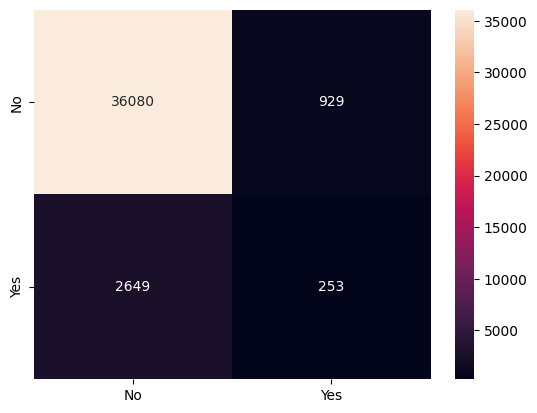

In [ ]:

# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)

# we have plenty of false predicted results
# these metrics are better in the Logistic regression

In [ ]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, rf_model.predict_proba(X.values)[:, 1])

# this result is the best amoung 4 different models

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9652274989871433

In [16]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
# Gender -> 0 => Female, 1 => Male
tester_row = {
    'BMI': 20.34, 
    'Smoking': 0, 
    'AlcoholDrinking': 0,  
    'Stroke': 0, 
    'PhysicalHealth': 0, 
    'MentalHealth': 0,
    'DiffWalking': 0,
    'Sex': 0, 
    'AgeCategory': 0,
    'Race': 0, 
    'Diabetic': 0,
    'PhysicalActivity': 1, 
    'GenHealth': 0, 
    'SleepTime': 0,  
    'Asthma': 0, 
    'KidneyDisease': 0,
    'SkinCancer': 0
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])

print("All probabilities by category:")
print("No and Yes:")
print(rf_model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does the person has a Heart Disease? (No/Yes):")
result = labels[rf_model.predict(tester_row)[0]]
print(result)

All probabilities by category:
No and Yes:
[[0.98 0.02]]

Does the person has a Heart Disease? (No/Yes):
No
